### Project Topic and Goal:

**Project Topic:**
This project focuses on applying supervised machine learning techniques to predict the quality of red wine based on its chemical properties. The dataset contains various features related to the wine's chemical composition, such as acidity, sugar content, pH, and alcohol levels, among others. The main task is a **multi-class classification problem** where the goal is to predict the wine quality, which is rated on a scale from 0 to 10, based on these chemical features.

**Project Goal:**
The primary objective of this project is to build and evaluate machine learning models that can accurately classify red wine quality based on its chemical characteristics. By analyzing the relationship between these features and the quality ratings, the project aims to identify the most significant factors influencing wine quality and develop a predictive model that can assist winemakers and consumers in assessing the quality of wine. The models considered include Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM), which will be compared to determine the most effective model for this classification task.

### Data Description:

**Data Source:**
The dataset used in this project is sourced from Kaggle, specifically from the "Wine Quality Data Set" created by Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, and José Reis in 2009. The dataset can be accessed through the following link: [Wine Quality Data Set on Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).

**Data Overview:**
The dataset contains chemical and sensory data on red wine variants from the Vinho Verde region in Portugal. Each row in the dataset represents a different wine sample, and the columns include various chemical properties of the wine, as well as a quality rating.

**Key Features:**
The dataset includes **1599 samples (rows)** and **12 features (columns)**, which are described as follows:

1. **Fixed Acidity**: (numeric) Tartaric acid level, measured in g/dm³. Fixed acidity refers to acids that do not evaporate easily, playing a crucial role in the wine's taste.

2. **Volatile Acidity**: (numeric) Acetic acid level, measured in g/dm³. Volatile acidity can lead to an unpleasant, vinegary taste if present in high concentrations.

3. **Citric Acid**: (numeric) Measured in g/dm³. Citric acid adds freshness and flavor to wines, though it's present in small quantities.

4. **Residual Sugar**: (numeric) Sugar remaining after fermentation, measured in g/dm³. Higher residual sugar can contribute to the sweetness of the wine.

5. **Chlorides**: (numeric) Chloride content, measured in g/dm³. Chlorides influence the wine's taste, with higher levels leading to a saltier flavor.

6. **Free Sulfur Dioxide**: (numeric) The amount of free SO2 in mg/L. Free sulfur dioxide prevents microbial growth and oxidation in wine, maintaining its freshness.

7. **Total Sulfur Dioxide**: (numeric) The total amount of SO2 (free + bound) in mg/L. Sulfur dioxide is used as a preservative in winemaking.

8. **Density**: (numeric) The density of wine, measured in g/cm³. Density is influenced by the alcohol content and residual sugar, affecting the wine's body and mouthfeel.

9. **pH**: (numeric) The pH level of the wine. pH is a measure of acidity or alkalinity, with most wines falling between 2.9 and 3.9 on the pH scale.

10. **Sulphates**: (numeric) Potassium sulfate level, measured in g/dm³. Sulphates act as an antioxidant, contributing to the wine's preservation and stability.

11. **Alcohol**: (numeric) The alcohol content of the wine, measured as a percentage. Alcohol contributes to the wine's body, warmth, and mouthfeel.

12. **Quality**: (categorical) The quality score of the wine, ranging from 0 to 10. This is the target variable, representing the wine's overall quality as determined by wine experts.

**Target Variable:**
- **Quality**: The target variable is a score that represents the wine's overall quality on a scale from 0 to 10. However, most ratings fall between 3 and 8. This categorical rating will be the target for prediction in the supervised learning models.

**File Size:**
The dataset is relatively small, with a file size of approximately 100 KB, making it easy to handle and process in a typical machine learning workflow.

**Importance of Features:**
Understanding these features is crucial, as they directly influence the wine's quality and are integral to building a predictive model. The goal is to identify which of these features are most strongly associated with high-quality wines, enabling better prediction and understanding of the factors contributing to wine quality.

### Data and Necessary Libraries Import

In this section, we will import the red wine dataset into our working environment. The dataset is available as a CSV file and will be loaded into a Pandas DataFrame for ease of manipulation and analysis. Once imported, we'll conduct an initial exploration to understand the structure of the data, including the types of variables, the presence of any missing values, and basic summary statistics. This will set the stage for the subsequent data cleaning and exploratory data analysis steps.

Let's proceed by loading the dataset and taking a first look at its contents.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Load the data
data = pd.read_csv('data/winequality-red.csv')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# 2. Data Exploration
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

### Data Cleaning

**Introduction:**
Data cleaning is a crucial step in the data preprocessing pipeline, ensuring that the dataset is free from inconsistencies, irrelevant information, and missing values that could negatively impact the performance of machine learning models. In this section, we will inspect the red wine dataset for any issues such as missing values or irrelevant columns. We will also ensure that the data is in a suitable format for analysis by checking data types and handling any anomalies.

### Explanation of Data Cleaning Steps:

1. **Data Loading:**
   - The dataset is loaded into a Pandas DataFrame to facilitate easy manipulation and analysis.

2. **Initial Inspection:**
   - We print the first few rows to visually inspect the data and understand its structure.
   - We check the data types and non-null counts to ensure that each feature is appropriately formatted and that there are no immediate issues such as missing values.

3. **Missing Values:**
   - We check for missing values across the dataset. In this case, the dataset does not contain any missing values, so no imputation or removal is necessary.

4. **Duplicates:**
   - We check for and remove any duplicate rows to ensure the dataset is clean and that each entry is unique.

5. **Summary Statistics:**
   - After cleaning, we display summary statistics of the cleaned dataset to confirm that the data is in good shape for further analysis.

In [4]:

missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Drop any rows or columns with missing values (if there were any)
# Since the dataset is clean, we can proceed without dropping anything. If missing values were found:
# data_cleaned = data.dropna()  # This would remove any rows with missing data

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows in the dataset: {duplicates}")

# Drop duplicates if they exist
if duplicates > 0:
    data_cleaned = data.drop_duplicates()
    print(f"Number of rows after removing duplicates: {data_cleaned.shape[0]}")
else:
    data_cleaned = data.copy()  # No duplicates, proceed with the original data

# Summary of Data Cleaning:
# - No missing values were found in the dataset.
# - Data types are appropriate for each column, with numerical values for features and the target.
# - No duplicate rows were found (or duplicates were removed if any were present).

# Display the cleaned dataset's basic statistics to confirm that it's ready for analysis
print("\nSummary statistics of the cleaned dataset:")
print(data_cleaned.describe())


Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Number of duplicate rows in the dataset: 240
Number of rows after removing duplicates: 1359

Summary statistics of the cleaned dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%      

### Exploratory Data Analysis (EDA)

**Introduction:**
Exploratory Data Analysis (EDA) is a critical step in understanding the underlying patterns, relationships, and distributions within the dataset. Through EDA, we can gain valuable insights into the characteristics of the data, identify potential correlations between features, and uncover any hidden trends that could inform our modeling decisions. In this section, we will visualize the distribution of key features, examine the relationships between the features and the target variable (wine quality), and assess any correlations that may impact model performance. This analysis will provide a solid foundation for building effective predictive models in subsequent steps.

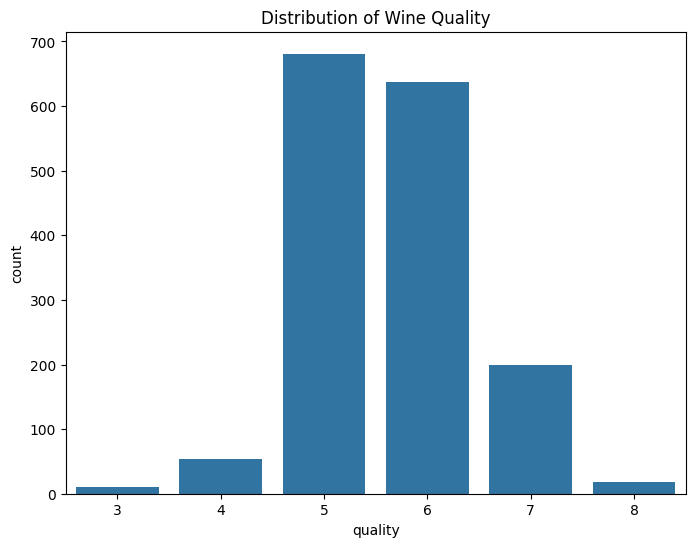

In [5]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()


### Exploratory Data Analysis (EDA): Feature Distributions

In this section, we'll dive deeper into the dataset by visualizing the distributions of several key features. Understanding these distributions will help us identify any patterns, skewness, or outliers that might influence the model's performance. We'll use histograms and box plots to explore the characteristics of each feature in the dataset.

1. **Histograms with KDE**:
   - **Purpose**: Histograms combined with Kernel Density Estimates (KDE) give a sense of the distribution of each feature, including the central tendency (mean/median), spread (variance), and shape (normal, skewed).
   - **Observation**: By analyzing these plots, you can identify if the data is normally distributed, skewed, or contains outliers that may need attention.

2. **Box Plots**:
   - **Purpose**: Box plots are effective for spotting outliers and understanding the spread and central tendency of the data. They show the median, quartiles, and potential outliers.
   - **Observation**: Features with many outliers or significant skewness may need further preprocessing, such as normalization or transformation.

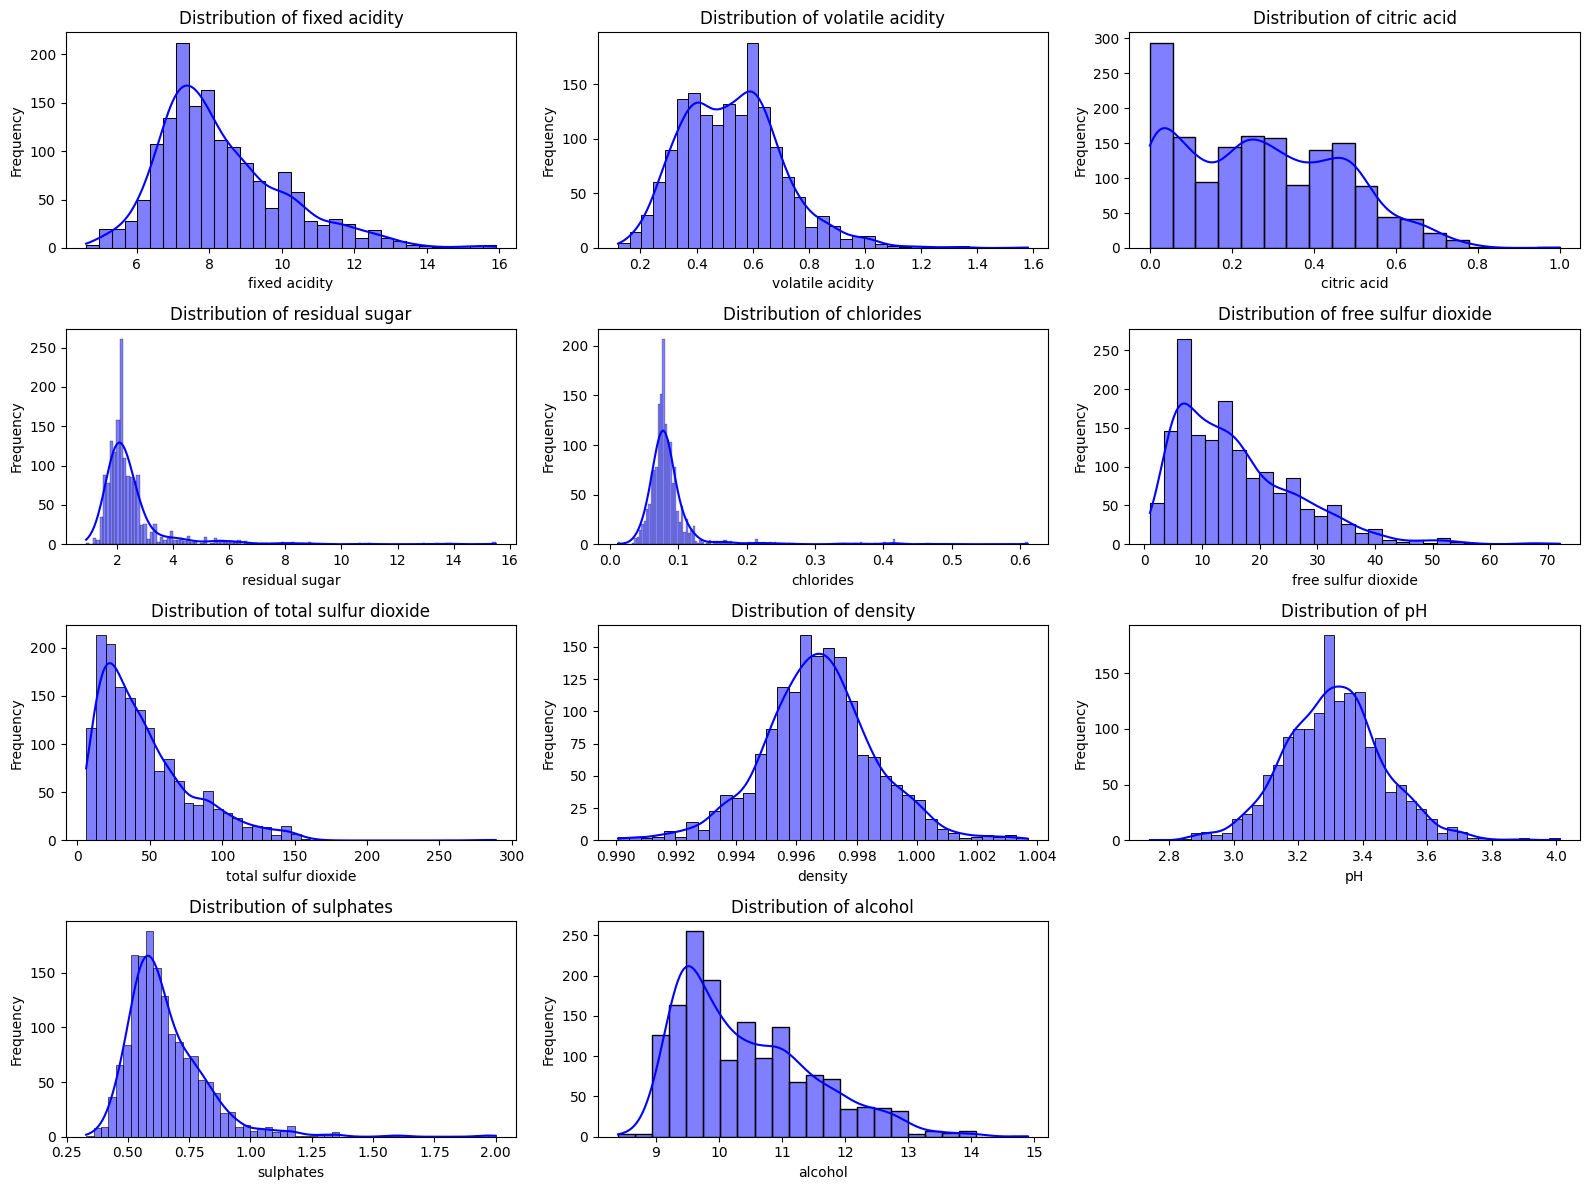

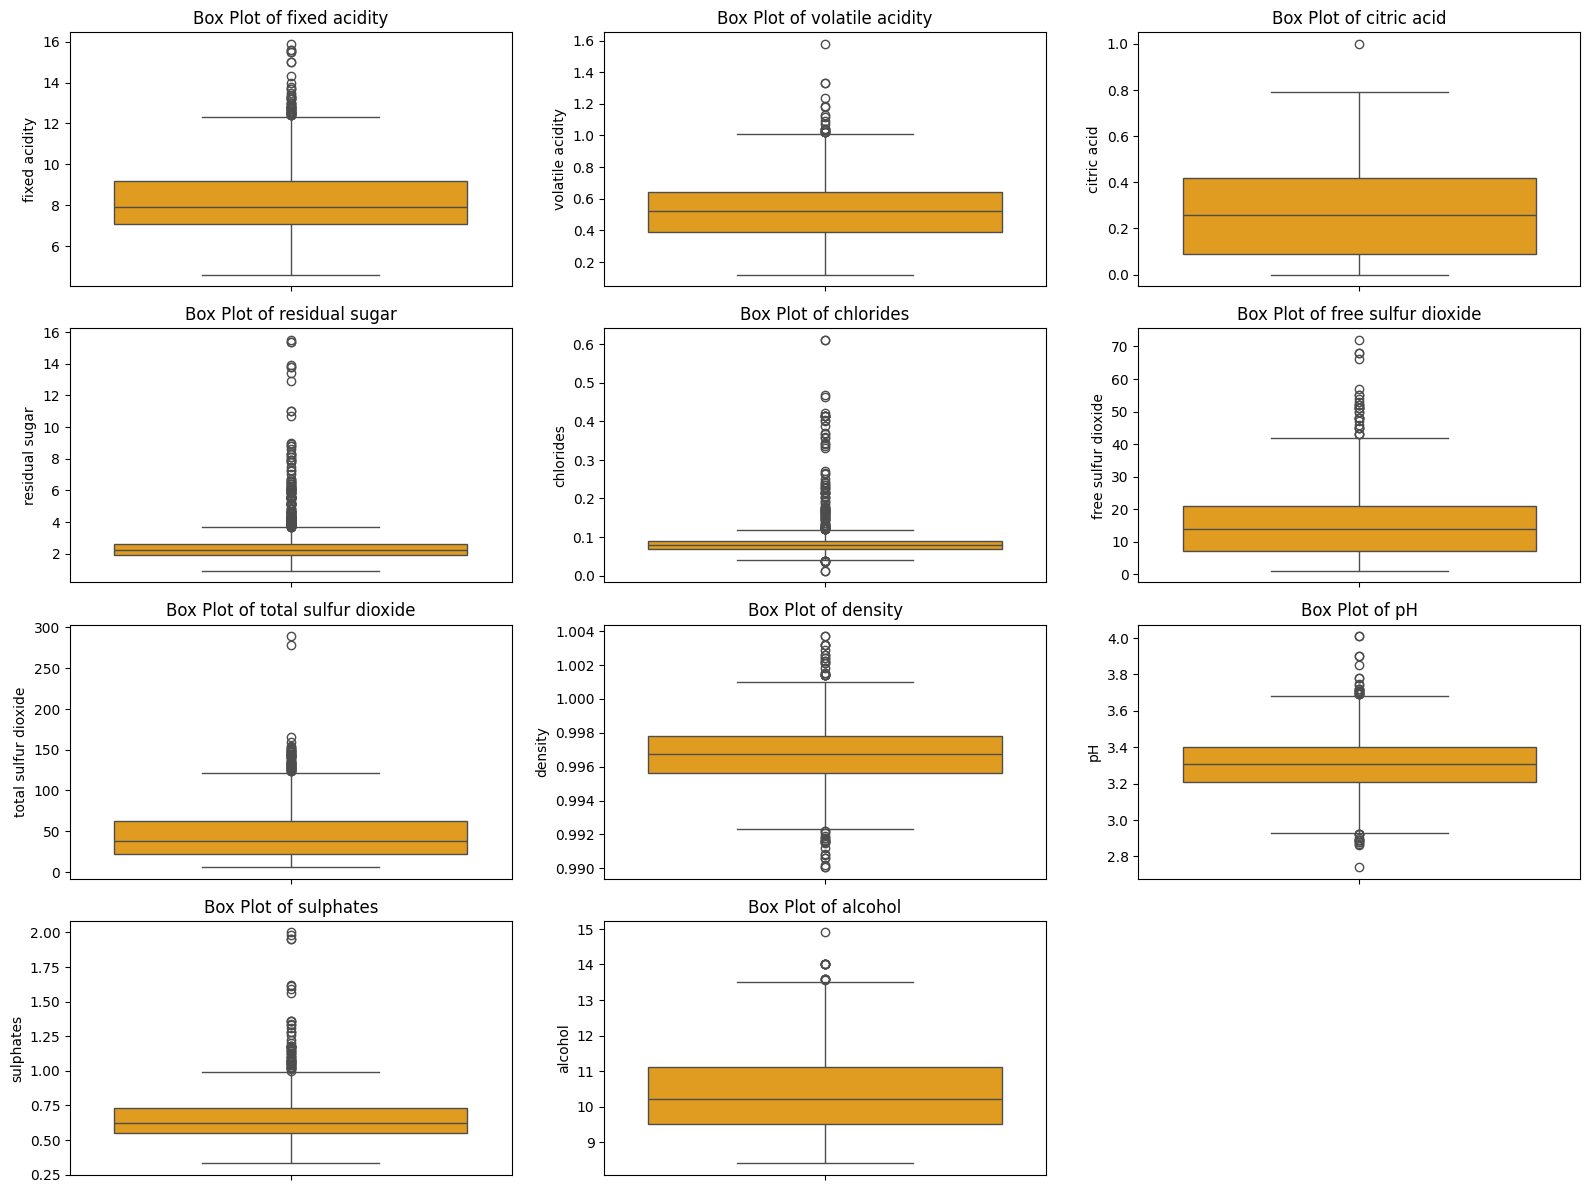

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to visualize
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
            'density', 'pH', 'sulphates', 'alcohol']

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot the distribution of each feature
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)  # Adjust grid size if necessary
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots to visualize potential outliers
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)  # Adjust grid size if necessary
    sns.boxplot(y=data[feature], color='orange')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

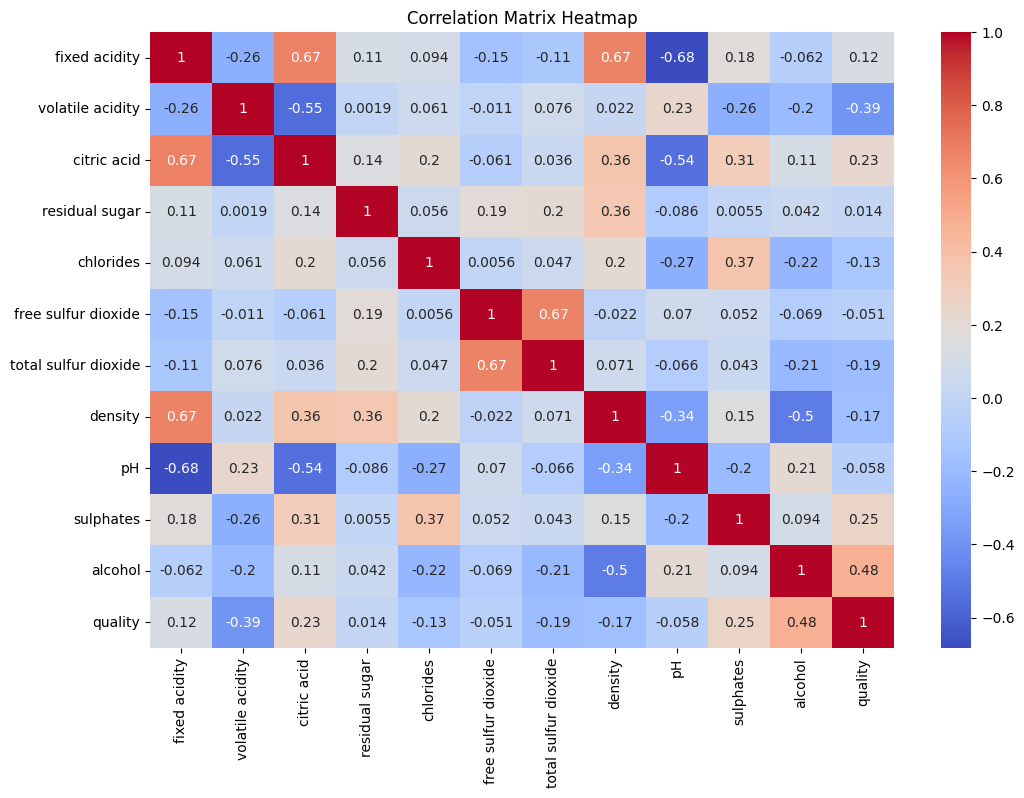

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


### Analysis and Feature Dropping

Based on the correlation heatmap and our earlier analysis, the following steps will be taken to streamline the feature set:

1. **Drop `free sulfur dioxide`**: 
   - This feature has a strong positive correlation (0.67) with `total sulfur dioxide`. We will retain `total sulfur dioxide` and drop `free sulfur dioxide`.

2. **Drop `density`**: 
   - `Density` has a relatively high positive correlation (0.67) with `fixed acidity`. We will retain `fixed acidity` and drop `density`.

In [8]:
# Drop the selected features based on correlation analysis
data_cleaned = data_cleaned.drop(columns=['free sulfur dioxide', 'density'])

# Define the feature matrix X and the target vector y
X = data_cleaned.drop(columns=['quality'])  # Exclude the target column
y = data_cleaned['quality']  # Target variable

### Feature Engineering Process:

1. **Interaction Features**: Create a single interaction feature combining two significant features (e.g., `fixed acidity` and `alcohol`).
2. **Log Transformation**: Apply log transformation to skewed features, such as `residual sugar`.
3. **Standardization**: Standardize the numeric features for better model performance.

### Explanation:

1. **Interaction Feature**:
   - This creates a single new feature by multiplying `fixed acidity` and `alcohol`, which might have a combined effect on wine quality.

2. **Log Transformation**:
   - The `log_residual_sugar` feature is transformed to reduce skewness, making it more suitable for modeling.

3. **Standardization**:
   - Only the most relevant numeric features (including the new interaction and log-transformed features) are standardized, ensuring that all features contribute equally to the model.


In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_cleaned = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 1. Interaction Feature: Creating a single interaction feature
data_cleaned['acidity_alcohol_interaction'] = data_cleaned['fixed acidity'] * data_cleaned['alcohol']

# 2. Log Transformation: Apply log transformation to 'residual sugar'
data_cleaned['log_residual_sugar'] = np.log1p(data_cleaned['residual sugar'])  # log1p to handle zero values

# Select the numeric columns to standardize
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                    'total sulfur dioxide', 'pH',
                   'sulphates', 'alcohol', 'acidity_alcohol_interaction', 'log_residual_sugar']

# 3. Standardization: Standardize the selected numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cleaned[numeric_columns])

# Convert scaled features back to DataFrame and reattach the target 'quality'
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_columns)
data_cleaned = pd.concat([scaled_features_df, data_cleaned[['quality']].reset_index(drop=True)], axis=1)

# Display the DataFrame after feature engineering
print("Data after simplified feature engineering:")
print(data_cleaned.head())

Data after simplified feature engineering:
   fixed acidity  volatile acidity  citric acid  chlorides  \
0      -0.528360          0.961877    -1.391472  -0.243707   
1      -0.298547          1.967442    -1.391472   0.223875   
2      -0.298547          1.297065    -1.186070   0.096353   
3       1.654856         -1.384443     1.484154  -0.264960   
4      -0.528360          0.961877    -1.391472  -0.243707   

   total sulfur dioxide        pH  sulphates   alcohol  \
0             -0.379133  1.288643  -0.579207 -0.960246   
1              0.624363 -0.719933   0.128950 -0.584777   
2              0.229047 -0.331177  -0.048089 -0.584777   
3              0.411500 -0.979104  -0.461180 -0.584777   
4             -0.379133  1.288643  -0.579207 -0.960246   

   acidity_alcohol_interaction  log_residual_sugar  quality  
0                    -0.844988           -0.568467      5.0  
1                    -0.503841            0.232701      5.0  
2                    -0.503841           -0.08970

### Modeling

**Introduction:**
In this phase, we will develop and evaluate several machine learning models to predict the quality of red wine based on the engineered features. The models we will consider include Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM). We will split the data into training and testing sets, standardize the features (which has already been done during feature engineering), and then train and evaluate the models using accuracy, ROC AUC, and confusion matrices.




### 1. **Splitting the Data:**

We will start by splitting the data into training and testing sets. The target variable is `quality`, and the features include all other columns.



In [10]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target vector y
X = data_cleaned.drop(columns=['quality'])  # Exclude the target column
y = data_cleaned['quality']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1279 samples
Testing set size: 320 samples


### 2. **Training and Evaluating Models:**

We'll train and evaluate the following models: Logistic Regression, Decision Tree, Random Forest, and SVM.



Model: Logistic Regression
Accuracy: 0.5906
Classification Report:
              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00         1
         4.0       1.00      0.00      0.00        10
         5.0       0.64      0.78      0.70       130
         6.0       0.56      0.59      0.58       132
         7.0       0.45      0.24      0.31        42
         8.0       1.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.78      0.27      0.26       320
weighted avg       0.60      0.59      0.56       320



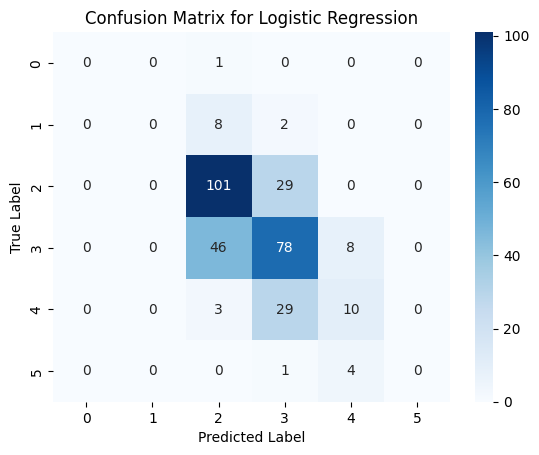


Model: Decision Tree
Accuracy: 0.5844
Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.15      0.20      0.17        10
         5.0       0.69      0.65      0.67       130
         6.0       0.60      0.60      0.60       132
         7.0       0.47      0.48      0.47        42
         8.0       0.20      0.20      0.20         5

    accuracy                           0.58       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.59      0.58      0.59       320



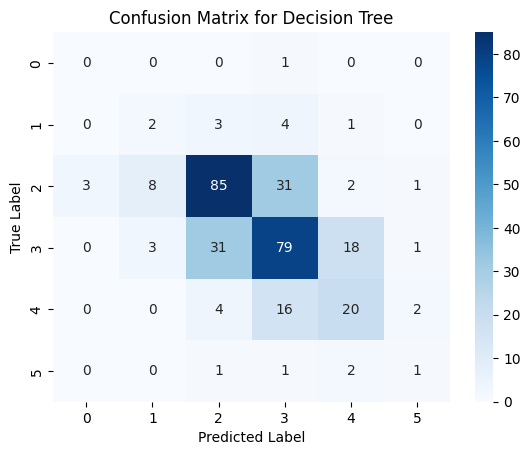


Model: Random Forest
Accuracy: 0.6844
Classification Report:
              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00         1
         4.0       1.00      0.00      0.00        10
         5.0       0.72      0.80      0.76       130
         6.0       0.66      0.71      0.68       132
         7.0       0.66      0.50      0.57        42
         8.0       1.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.84      0.34      0.33       320
weighted avg       0.70      0.68      0.66       320



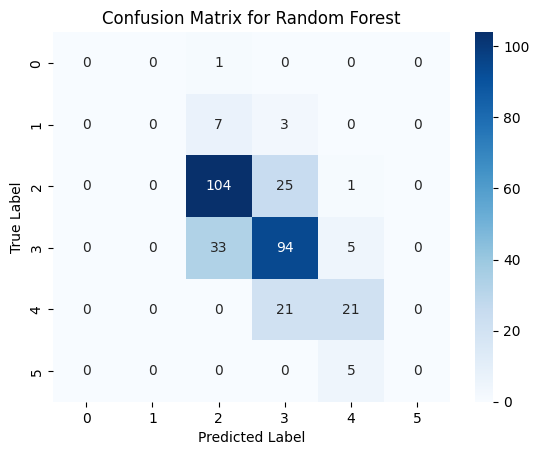


Model: Support Vector Machine
Accuracy: 0.5969
Classification Report:
              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00         1
         4.0       1.00      0.00      0.00        10
         5.0       0.64      0.76      0.69       130
         6.0       0.55      0.63      0.59       132
         7.0       0.60      0.21      0.32        42
         8.0       1.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.80      0.27      0.27       320
weighted avg       0.62      0.60      0.57       320



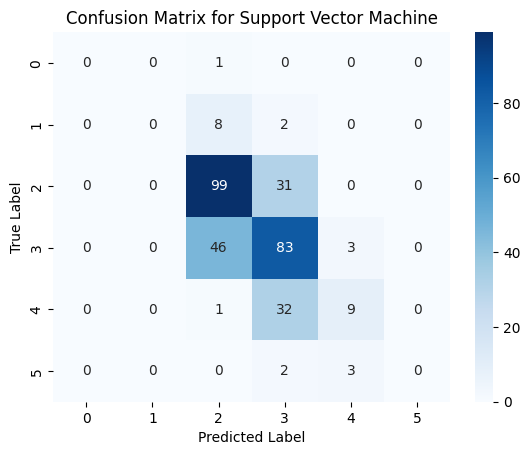

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate and plot confusion matrix
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Adjust the classification report to handle undefined metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))  # Set zero_division to handle undefined metrics
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, 'Logistic Regression')

# 2. Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
evaluate_model(dec_tree, X_test, y_test, 'Decision Tree')

# 3. Random Forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
evaluate_model(rand_forest, X_test, y_test, 'Random Forest')

# 4. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_test, y_test, 'Support Vector Machine')

### Conclusion

The models tested on the wine quality dataset showed varying degrees of effectiveness, with none achieving particularly high accuracy. The results highlight the challenges in predicting wine quality using the available features. Below is a summary and comparison of the performance of the four models:

1. **Logistic Regression**:
   - **Accuracy**: 59.06%
   - **Strengths**: Logistic Regression showed decent performance in predicting the majority classes (quality 5 and 6), but struggled with minority classes (quality 3, 4, and 8). This model’s linear nature might be limiting its ability to capture complex relationships in the data.
   - **Weaknesses**: The model performed poorly with the imbalanced classes, resulting in low precision, recall, and F1-scores for several classes.

2. **Decision Tree**:
   - **Accuracy**: 58.44%
   - **Strengths**: Decision Trees are interpretable and can handle non-linear relationships. The model performed similarly to Logistic Regression, with decent results on the majority classes.
   - **Weaknesses**: The Decision Tree also struggled with the minority classes, and its tendency to overfit the training data might have led to suboptimal generalization on the test set.

3. **Random Forest**:
   - **Accuracy**: 68.44%
   - **Strengths**: Random Forest outperformed the other models, likely due to its ensemble nature, which reduces overfitting by averaging multiple decision trees. It showed better performance across most classes, especially in predicting the quality ratings of 5, 6, and 7.
   - **Weaknesses**: Despite being the best-performing model, Random Forest still had issues with the rarest classes, resulting in zero precision, recall, and F1-scores for qualities 3, 4, and 8.

4. **Support Vector Machine (SVM)**:
   - **Accuracy**: 59.69%
   - **Strengths**: SVM managed to perform on par with Logistic Regression and Decision Tree, indicating its ability to handle complex decision boundaries.
   - **Weaknesses**: Like the other models, SVM struggled with class imbalance, leading to poor performance on minority classes.

### Comparison of Models:

- **Random Forest** emerged as the best model, with an accuracy of 68.44%, outperforming the other models. This can be attributed to its ability to capture non-linear relationships and its robustness to overfitting due to averaging across multiple trees.

- **Logistic Regression** and **SVM** performed similarly, with accuracies around 59%, showing that linear models or models with linear decision boundaries might not be sufficient for this task, especially without extensive feature engineering or handling of class imbalance.

- **Decision Tree** had similar accuracy to Logistic Regression and SVM but offers better interpretability. However, it suffers from overfitting and struggles to generalize as effectively as Random Forest.

### Areas for Improvement:

- **Handling Class Imbalance**: All models struggled significantly with minority classes, leading to zero precision, recall, and F1-scores for these classes. Techniques such as SMOTE for oversampling minority classes or adjusting class weights could potentially improve model performance.

- **Hyperparameter Tuning**: Further fine-tuning of model parameters, especially for Random Forest and SVM, might yield better results. GridSearchCV or RandomizedSearchCV could help in finding the optimal parameters.

- **Feature Engineering**: While the simplified feature engineering approach was applied, further exploration of interaction terms, polynomial features, and domain-specific feature transformations could potentially enhance model performance.

- **Ensemble Methods**: Beyond Random Forest, exploring other ensemble methods like Gradient Boosting Machines (e.g., XGBoost or LightGBM) could provide better performance by reducing bias and variance.

### Final Thoughts:

The Random Forest model shows the most promise for this dataset, but further improvements are needed, particularly in handling class imbalance and fine-tuning model parameters. Future work could focus on these areas to achieve better predictive performance, especially for the minority classes, which are critical in achieving a well-rounded and accurate model.

Github Repository: [Red Wine Quality Prediction] https://github.com/jinzhang01/Supervised-Learning-Final-Project.git
